# Loan Application Status Prediction

# Importing neccessary Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [16]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df.sample(5)#randomly 5 sample

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
264,LP001872,Male,No,0,Graduate,Yes,5166,0.000000,128.0,360.0,1.0,Semiurban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.000000,NaN,360.0,1.0,Urban,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.000000,170.0,360.0,1.0,Rural,N
428,LP002369,Male,Yes,0,Graduate,No,2920,16.120001,87.0,360.0,1.0,Rural,Y
360,LP002161,Female,No,1,Graduate,No,4723,0.000000,81.0,360.0,1.0,Semiurban,N


We can observe both categorical and the numerical features where the target feature Loan_Status is having only two unique values. So we will use classification models.

In [18]:
df.shape #shape of data

(614, 13)

So we can see there are 614 rows and 13 columns where 12 columns are input feature and one column is target feature(/output).Here our target feature is Loan_Statu

# Type of Problem:-

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

So this problem refers to classification problem as we have to predict loan is to be approved or not

In [19]:
df.info() #imformation of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset consists 4 float type data, 1 integer data and 8 object type data.

In [20]:
df.dtypes #datatypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

So there are 8 categorical datatypes and remaining 5 are numeric datatypes.

In [21]:
df.keys() #keys of data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So we can see there are missing values in several columns.

# Exploratory Data Analysis:

In [23]:
#summary statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can see there is a large difference between 75th percentile and the maximum value in 'ApplicantIncome','CoapplicantIncome','LoanAmount' features.

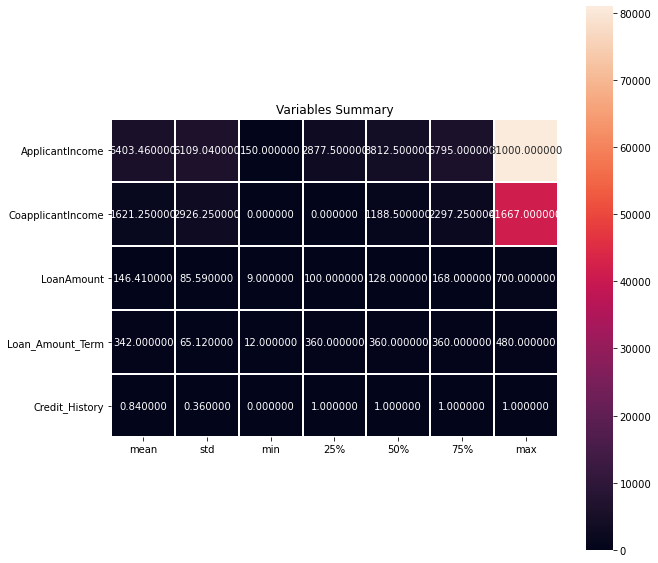

In [24]:
#plotting for the describe method
figure=plt.figure(figsize=(5,8))
figure.set_size_inches(10,10)
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,fmt='f',annot=True,square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variables Summary")
plt.show()

# Checking for unique values:-

In [25]:
df['Gender'].unique() #unique value for gender

array(['Male', 'Female', nan], dtype=object)

In [26]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

So as usual the gender column is having two categorical entries male and female.

In [27]:
df['Married'].value_counts() #counts for married column

Yes    398
No     213
Name: Married, dtype: int64

The married column is also contains two unique values 'Yes' and 'No'.

In [28]:
df['Dependents'].value_counts() # dependents counts

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
df['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [30]:
df['Loan_Status'].value_counts() #loan status value counts

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data Visualization:

In [31]:
df.columns #columns of data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_ID', ylabel='count'>

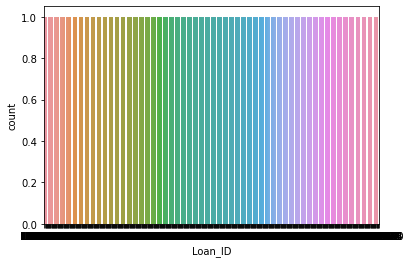

In [32]:
sns.countplot(df['Loan_ID'])
#showing loan id

<AxesSubplot:xlabel='Gender', ylabel='count'>

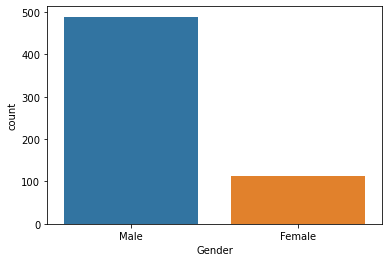

In [33]:
sns.countplot(df['Gender'])
# count plot showing males are more compare to female for loan

<AxesSubplot:xlabel='Married', ylabel='count'>

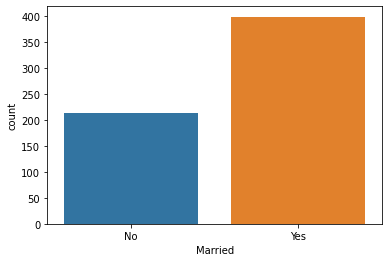

In [34]:
sns.countplot(df['Married'])

The count of married is higher than unmarried.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

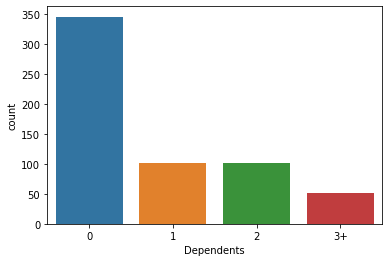

In [35]:
sns.countplot(df['Dependents'])
#countplot showing that mostly people have 0 dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

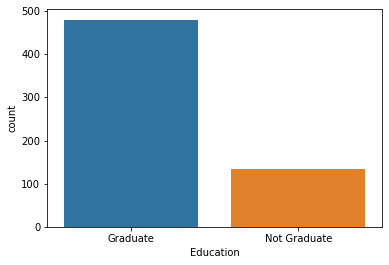

In [36]:
sns.countplot(df['Education'])
#countplot showing that mostly are graduates

<AxesSubplot:xlabel='Education', ylabel='Count'>

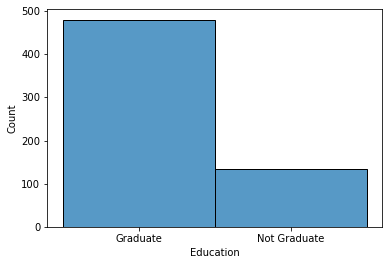

In [37]:
sns.histplot(df['Education'])
# countplot showing that education have mostly graduates

High rate of graduates are found.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

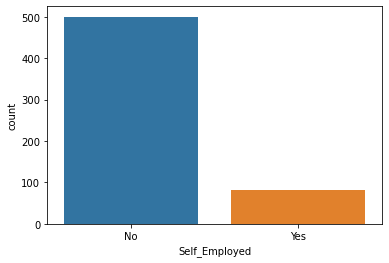

In [38]:
sns.countplot(df['Self_Employed'])

Most of them are not self_Employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

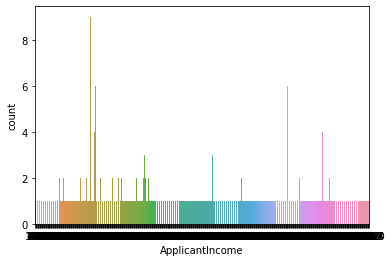

In [39]:
sns.countplot(df['ApplicantIncome'])
#showing applicant income

<AxesSubplot:>

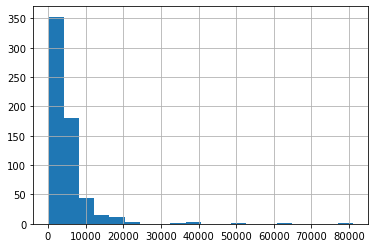

In [40]:
df['ApplicantIncome'].hist(bins=20)

We can see a right skewed curve so we will normalise it in further process.

<AxesSubplot:>

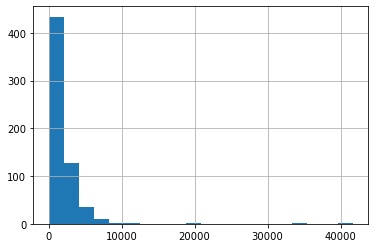

In [42]:
df['CoapplicantIncome'].hist(bins=20)

Similar to the ApplicantIncome CoapplicantIncome also have a right skwed curve so eventually we will normalise it aswell.

<AxesSubplot:>

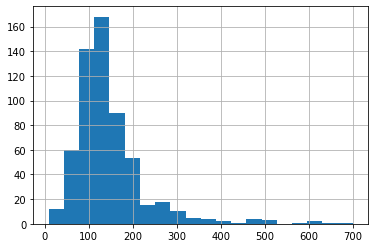

In [43]:
df['LoanAmount'].hist(bins=20)

The curve is not normally distributed.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

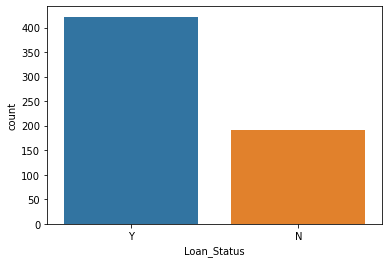

In [44]:
sns.countplot(df['Loan_Status'])

Loan_Status with count Y is more than N

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

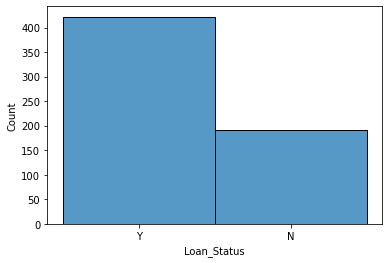

In [45]:
sns.histplot(df['Loan_Status'])

# Bivariate Analysis:

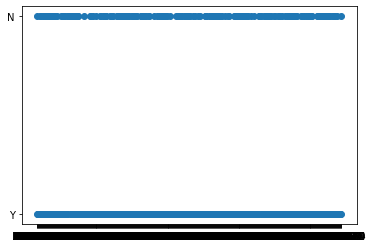

In [46]:
plt.scatter(df['Loan_ID'],df['Loan_Status'])
#scatter plot showing loan id and loan status

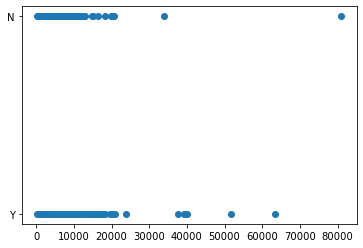

In [47]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
#scatter plot showing applicant income and loan status

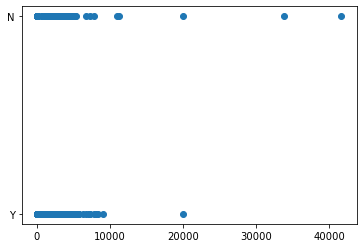

In [48]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])
#scatter plot showing coapplicant income and loan status

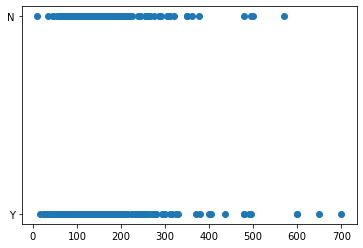

In [49]:
plt.scatter(df['LoanAmount'],df['Loan_Status'])
#scatter plot showing loan amount and loan status

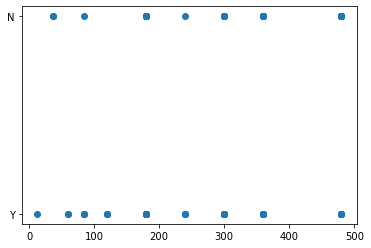

In [50]:
plt.scatter(df['Loan_Amount_Term'],df['Loan_Status'])
#scatter plot showing loan amount term and loan status

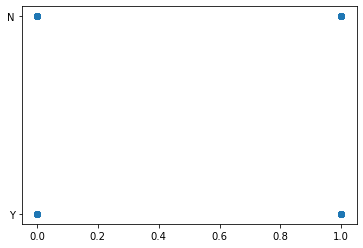

In [51]:
plt.scatter(df['Credit_History'],df['Loan_Status'])
#scatter plot showing credit history and loan status

# Multivariate Analysis:

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

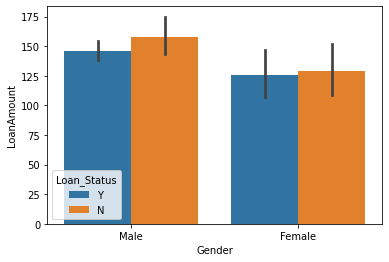

In [52]:
sns.barplot(x='Gender',y='LoanAmount',hue='Loan_Status',data=df)
#barplot showing loan status with respect to gender and loan amount

We can see that LoanAmount of male with negative Loan_Status is higher than female.

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

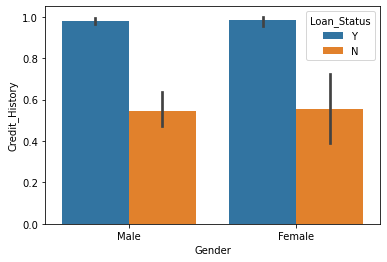

In [53]:
sns.barplot(x='Gender',y='Credit_History',hue='Loan_Status',data=df)
#loan status with respect to gender and credit history

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

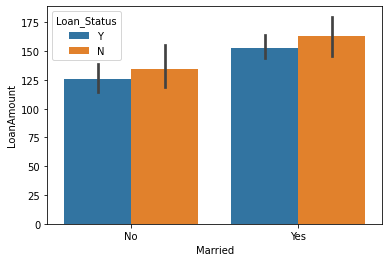

In [54]:
sns.barplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df)

We can see that married are actually getting more loanamount than unmarried ones.

# Normal distribution curve:

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

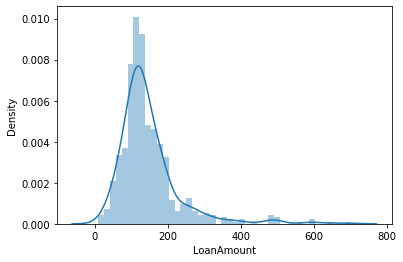

In [55]:
sns.distplot(df['LoanAmount'])
# loan amount showing distribution which is not normally distrubuted curve

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

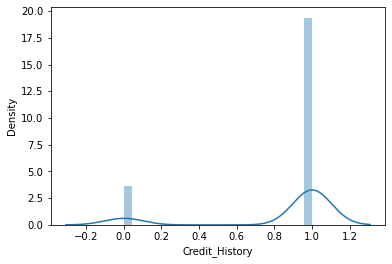

In [56]:
sns.distplot(df['Credit_History'])
#credit history showing much of variations

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

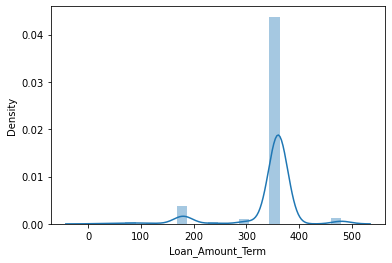

In [57]:
sns.distplot(df['Loan_Amount_Term'])
#loan_amount_term showing skewness which is to be removed

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

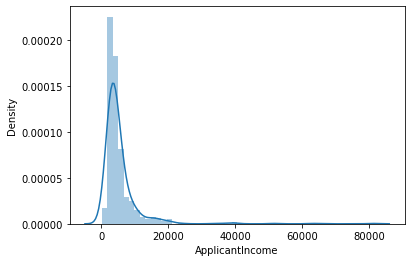

In [58]:
sns.distplot(df['ApplicantIncome'])
#showing right skewness in applicant income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

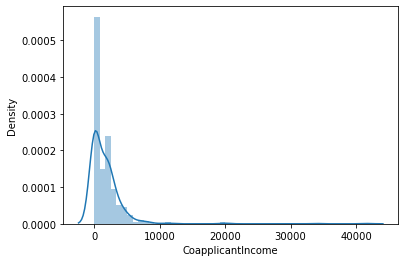

In [59]:
sns.distplot(df['CoapplicantIncome'])
#again right skewness in coapplicant income

# PairPlot

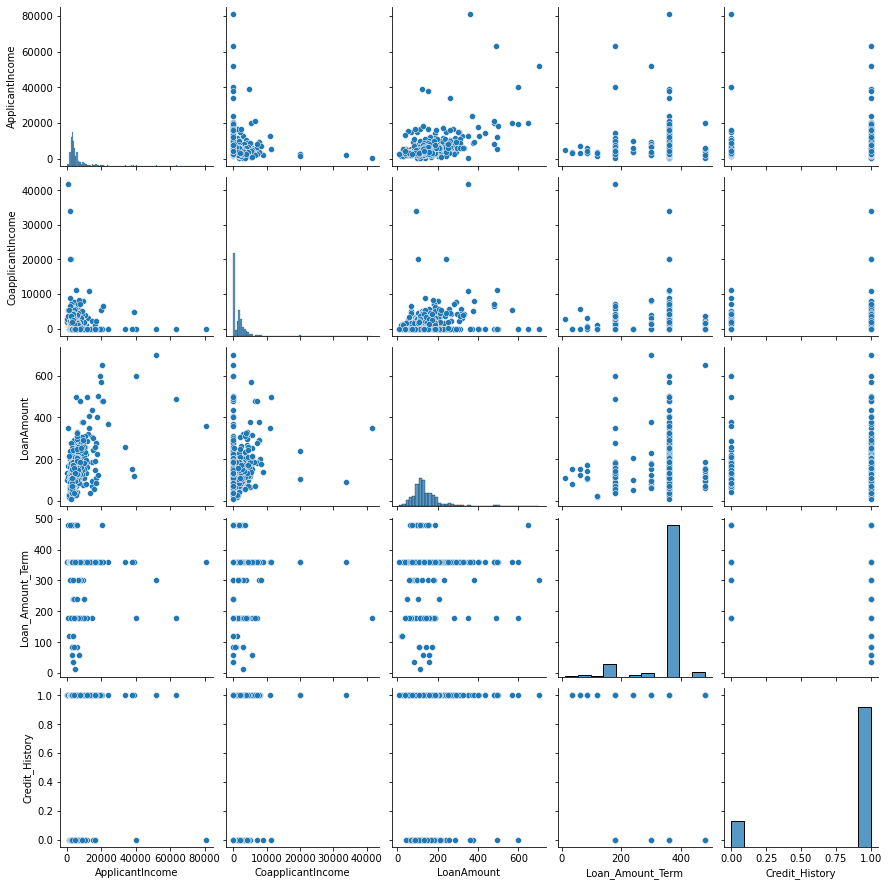

In [60]:
sns.pairplot(df) #pair plot showing all inputs data

We can see the skewness in most of the features so we will remove it in further process.

# Correlation:

In [61]:
corr=df.corr() #coorelation
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

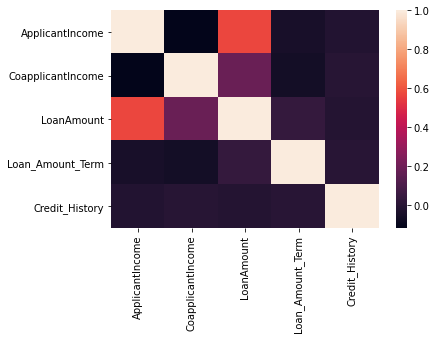

In [62]:
sns.heatmap(corr)#heatmap of correlated data

ApplicantIncome is positively correlated with the loanamount.

plt.figure(figsize=(10,6))
sb.heatmap(corr,cmap='Oranges',annot=True)

<AxesSubplot:>

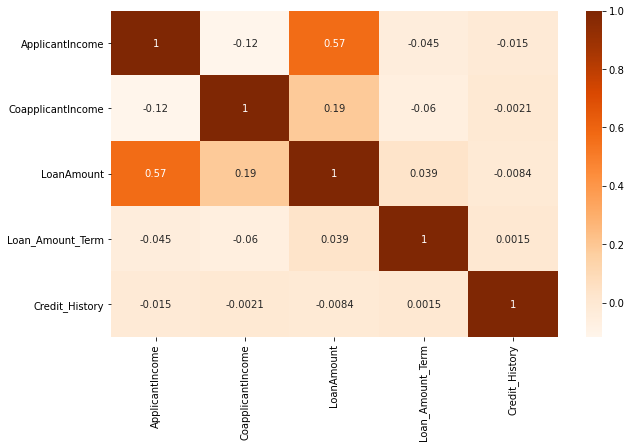

In [63]:
plt.figure(figsize=(10,6))
sb.heatmap(corr,cmap='Oranges',annot=True)

Since Loan_ID is unique for each individual and it is not much contributing to our target feature we will drop that column.

In [64]:
df.drop('Loan_ID',axis=1,inplace=True) #dropping loan id

In [65]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Loan_Id feature is dropped.

# Plotting Outliers:

<AxesSubplot:xlabel='ApplicantIncome'>

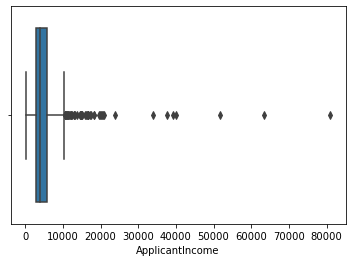

In [66]:
sns.boxplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

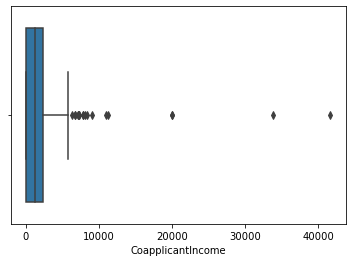

In [67]:
sns.boxplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Credit_History'>

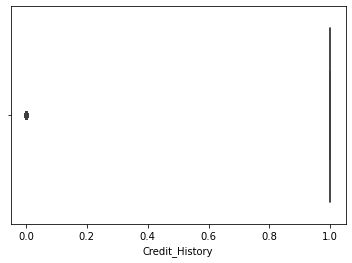

In [68]:
sns.boxplot(df['Credit_History'])

<AxesSubplot:xlabel='LoanAmount'>

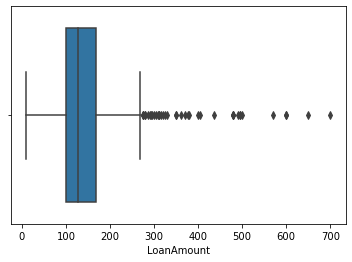

In [69]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

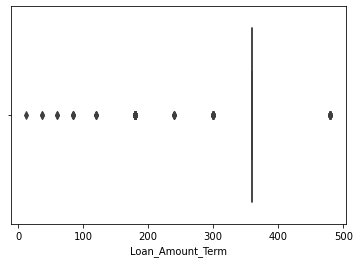

In [70]:
sns.boxplot(df['Loan_Amount_Term'])

We can observe the outliers above

# Handling missing values:

<AxesSubplot:>

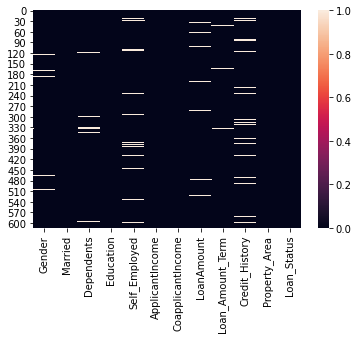

In [71]:
#checking null values using heatmap
sns.heatmap(df.isnull())

Filling missing values:

Since Gender,Married,Dependents,Loan_Amount_Term,Credit_history are all object type so we will use mode function to fill null values. And LoanAmount is numerical datatype we will use mean function to fill null values in it.

In [72]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) #fill value with mode


In [73]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True) #fill value with mode of column

In [74]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) #fill null value with mode

In [75]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True) #fill null value with mode

In [76]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount).mean() # as continous value so fill value with mean of data

In [77]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True) # fill null value with mode

In [78]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) #fill null value with mode

In [79]:
df.isnull().sum() #chking null values again

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
df.head() #first 5 rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,146.412162,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,146.412162,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,146.412162,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,146.412162,360.0,1.0,Urban,Y


# Removal of Outliers:

In [81]:
z=np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
z.shape # zscore of columns

(614, 5)

In [82]:
threshold=3    #chking threshold
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 133, 155, 171, 177, 183, 185, 242, 262,
       313, 333, 402, 409, 417, 443, 495, 497, 546, 575, 581, 585, 600]), array([1, 3, 3, 3, 0, 3, 0, 0, 1, 0, 0, 3, 3, 3, 0, 1, 0, 1, 0, 3, 3, 3,
       3, 1, 3, 1]))


In [83]:
df_new=df[(z<3).all(axis=1)] #new dataset after removal of outlier

# Encoding:

In [84]:
#we are using labelencoding to convert categorical features into numerical.
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Dependents']=le.fit_transform(df['Dependents'])
df.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,146.412162,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,146.412162,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,146.412162,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,146.412162,360.0,1.0,2,1


# Feature Engineering:

In [85]:
#using StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(df)

In [86]:
Scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
        -1.31851281, -1.48253724],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.41173269,
         1.22329839,  0.67451931],
       [-2.11710719, -1.37208932, -0.73780632, ..., -2.42876026,
        -0.04760721, -1.48253724]])

In [87]:
#checking skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           0.000000
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Training and testing of data

In [88]:
#splitting the data into input and output features
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

# Removing Skewness:

In [89]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.75540037e-01, -2.42876026e+00,  2.36103342e-03]])

# Splitting the data:

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Using Classification algorithms:

# 1. Decision Tree Classifier:

In [91]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train) #training data

DecisionTreeClassifier()

In [93]:
y_pred=dt.predict(x_test) #testing data
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test)) #accuracy score

0.7560975609756098


In [95]:
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy of DecisionTreeClassifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Decision Tree Classifier:\n\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.55      0.55      0.55        33
           1       0.83      0.83      0.83        90

    accuracy                           0.76       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.76      0.76      0.76       123

Test Accuracy of DecisionTreeClassifier is:75.61%


Confusion Matrix of Decision Tree Classifier:

 [[18 15]
 [15 75]]


# 2. Random Forest Classifier:

In [96]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [101]:
print(accuracy_score(y_pred_rf,y_test))

0.7886178861788617


In [102]:
print("Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy of RandomForestClassifier is:{}%".format(round(rf.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Random Forest Classifier:\n\n",confusion_matrix(y_test,y_pred_rf))

Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.83      0.90      0.86        90

    accuracy                           0.79       123
   macro avg       0.73      0.69      0.71       123
weighted avg       0.78      0.79      0.78       123

Test Accuracy of RandomForestClassifier is:78.86%


Confusion Matrix of Random Forest Classifier:

 [[16 17]
 [ 9 81]]


# 3. GaussianNB Classifier:

In [103]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [104]:
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [105]:
print(accuracy_score(y_pred_nb,y_test))

0.8292682926829268


In [106]:
print("GaussianNB Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy of GaussianNB is:{}%".format(round(nb.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of GaussianNB Classifier:\n\n",confusion_matrix(y_test,y_pred_nb))

GaussianNB Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123

Test Accuracy of GaussianNB is:82.93%


Confusion Matrix of GaussianNB Classifier:

 [[15 18]
 [ 3 87]]


# 4.Logistic Regression:

In [107]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [108]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [109]:
print(accuracy_score(y_pred_lr,y_test))

0.8373983739837398


In [110]:
print("Logistic Regression: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy of Logistic Regression is:{}%".format(round(lr.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Logistic Regression:\n\n",confusion_matrix(y_test,y_pred_lr))

Logistic Regression: 

               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Test Accuracy of Logistic Regression is:83.74%


Confusion Matrix of Logistic Regression:

 [[15 18]
 [ 2 88]]


# 5.Support Vector Classifier:

In [111]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [112]:
y_pred_svm=svm.predict(x_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [113]:
print(accuracy_score(y_pred_svm,y_test))

0.7317073170731707


In [114]:
print("SVC: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy of SVC is:{}%".format(round(svm.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of SVC:\n\n",confusion_matrix(y_test,y_pred_svm))

SVC: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123

Test Accuracy of SVC is:73.17%


Confusion Matrix of SVC:

 [[ 0 33]
 [ 0 90]]


# Cross Validation Score:

In [115]:
print("Decision Tree Classifier:",cross_val_score(dt,x,y,cv=5).mean()) #cv of decision tree

Decision Tree Classifier: 0.742676262828202


In [116]:
print("Random Forest Classifier:",cross_val_score(rf,x,y,cv=5).mean()) #cv for random forest

Random Forest Classifier: 0.7785019325603092


In [117]:
print("GaussianNB Classifier:",cross_val_score(nb,x,y,cv=5).mean()) #cv for gnb

GaussianNB Classifier: 0.7981074236971878


In [118]:
print("Logistic Regression:",cross_val_score(lr,x,y,cv=5).mean()) #cv for logistic regression

Logistic Regression: 0.8045581767293083


In [119]:
print("SVC:",cross_val_score(svm,x,y,cv=5).mean())

SVC: 0.6872984139677463


We can see that logistic Regression is giving a good accuracy score and cross validation score we will consider that model to further process.

# Hyper Parameter Tuning:

In [120]:
#passing five parameters for tuning
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l2',None],
           'dual':[False],
           'C':[1.0],
           'fit_intercept':[True],
           'intercept_scaling':[1]}
grid=GridSearchCV(estimator=lr, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0], 'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'penalty': ['l2', None]})

In [121]:
#obtaining best parameters
best_parameters=grid.best_params_
print(best_parameters)

{'C': 1.0, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l2'}


In [122]:
#passing new parameters
clf=LogisticRegression(C=1.0,dual=False,fit_intercept=True,intercept_scaling=1,penalty='l2')
clf.fit(x_train,y_train)

LogisticRegression()

In [123]:
#caculating the accuracy
clf.score(x_test,y_test)

0.8373983739837398

Thus the obtained accuracy is very much similar to the previous accuracy score i.e.,83.74%. Our model is performing well using Logistic Regression.

# AUC-ROC Curve:

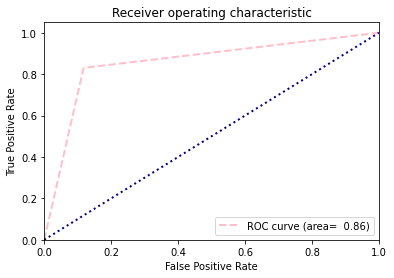

In [124]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_lr,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, linestyle='--',label='ROC curve (area= % 0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Further Evaluation:

In [125]:
Final_mod = LogisticRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((lr.score(x_test,y_test)*100))

83.73983739837398


# Saving the best model:

In [126]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [127]:
dataframe=({})
dataframe['Predicted Status']=y_pred_lr
dataframe['Actual Status']=y_test.values
dataframe

{'Predicted Status': array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]),
 'Actual Status': array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])}

Thus our train and test data is balanced with the accuracy of 83.73%.